# IGTI - Datascience BootCamp

In [ ]:
# caso tenha alguma duvida, basta me chamar:
# linkedin: https://bit.ly/2OfWEbT
# ou para quem veio do grupo no whats, pode me chamar lá tbm

### Pergunta 1 e 2
Acredito que a melhor forma de entender o Kmeans é sem sobras de duvidas ver um exemplo visual, então vou deixar aqui o link de conteudo  do
canal sandeco, onde ele exemplifica muito bem o seu funcionamento, é divido é duas partes uma delas a teorica e outra a sua aplicação usando python

https://www.youtube.com/watch?v=piDlrtfz58s
https://www.youtube.com/watch?v=yfu-HH0nyFI

e para complementa vou deixar tambem o o link da biblioteca do sklearn, para ser mais especifico do modulo kmeans, onde ele descreve a função

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

aqui tem um texto muito bom tbm
https://www.edupristine.com/blog/beyond-k-means

aula do Andrew ng sobre Kmeans
https://www.youtube.com/watch?v=hDmNF9JG3lo

### Pergunta 3

Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

In [2]:
# a questão 3, o proprio codigo que eles disponibilizam da a resposta

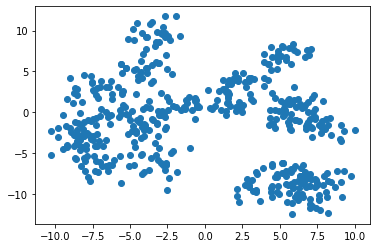

In [1]:
from math import sqrt #importando biblioteca de matematica do python | mais especifico de Raiz quadrada
from matplotlib import pyplot as plt # matplotlib é a biblioteca que gera graficos 
from sklearn.datasets import make_blobs #Gere "bolhas (grupos)" Gaussianos isotrópicos para agrupamento.
from sklearn.cluster import KMeans # biblioteca kmeans 

X, y = make_blobs(n_samples=500, centers=20, random_state=999) #gerano dados e armazenando em variaveis
# X armazena a posição em um plano cartesiano
# y amarzena o valor a qual grupo o X faz parte


plt.scatter(X[:,0], X[:,1]) #demonstando o Grafico

plt.show() #essa função o grafico

### Pergunta 4
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [3]:
#chamando o Kmeans e colocando os parametros que foram pedidos
clusterModel = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10) 

#treinando o Modelo com os dados
clusterModel.fit(X) 

#mostrando em quais posições de um plano cartesiano se localiza o "Centroid" com apenas 1 cluster
clusterModel.cluster_centers_

array([[ 0.02618523, -1.30384304]])

### pergunta 5
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?
Grupo de escolhas da pergunta


In [ ]:
# a soma dos quadrados intra-clusters (Within-Cluster-Sum-of-Squares) ou WCSS nada mais é que a função kmeans.inertia_

In [5]:
#chamando o Kmeans e colocando os parametros que foram pedidos
clusterModel = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10) 

#treinando o Modelo com os dados
clusterModel.fit(X) 

# fazendo o kmeans mostrar qual é a soma dos quadrados intra-clusters (Within-Cluster-Sum-of-Squares) ou WCSS 
clusterModel.inertia_

31547.372471390485

### Pergunta 6
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [ ]:
# basicamente é o mesmo codigo anterior basta trocar o parametro n_cluster para o valor pedido: 5

In [11]:
#chamando o Kmeans e colocando os parametros que foram pedidos
clusterModel = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10) 

#treinando o Modelo com os dados
clusterModel.fit(X) 

# fazendo o kmeans mostrar qual é a soma dos quadrados intra-clusters (Within-Cluster-Sum-of-Squares) ou WCSS 
clusterModel.inertia_

4717.404091931214

### Pergunta 7
Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

para essa questão existem duas formas de se responder: a forma do IGTI e a FORMA FACIL, vou abordar as duas, com foco na maneira facil

4


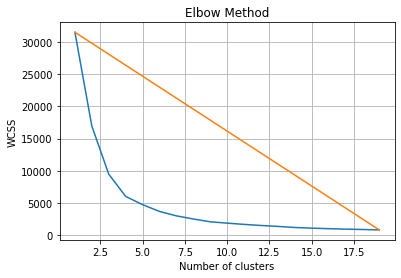

In [12]:
def optimal_number_of_clusters(wcss): # criando uma função no python
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#aquo a baixo vemos o n° de clusters

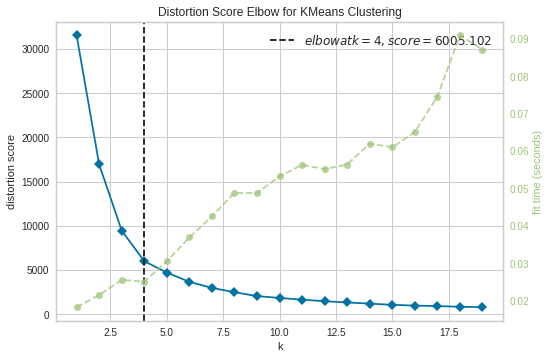

In [25]:
from yellowbrick.cluster import KElbowVisualizer # importando a biblioteca necessária
# para quem curte documentação ta aqui: >>  https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# para quem é mais audio visual aqui: >> https://youtu.be/kES7Mp8oi7Q?t=4552 # sugiro ver o video todo para entender melhor

visualizer = KElbowVisualizer(kmeans, k=(1, 20)) #como parametros temos o model (kmeans) e o "k" é range que eu quero testar indo de 1 a 20
visualizer.fit(X) #aqui ele está treinando
visualizer.show() #aqui ele plota o grafico

### Pergunta 8
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?
Grupo de escolhas da pergunta


sou a favor de quanto mais ferramentas o desevenvolvedor conhece melhor, porém eu vou fazer tudo em python ao inves de ir para o PoweraBI, por dois motivos simples, I - para o notebook ficar completo; II - necessito treinar mais minhas habilidades em plotagens de grafico

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')
df_covid_19 = pd.read_csv('datasets/covid_19_data.csv', index_col='SNo')

In [46]:
#criando uma coluna nova no dataset essa é o total de casos ativos
df_covid_19['Active'] = df_covid_19['Confirmed'] - (df_covid_19['Deaths'] + df_covid_19['Recovered'])

In [7]:
df_covid_19

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
SNo,,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
59755,07/08/2020,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0,293.0
59756,07/08/2020,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0,2295.0
59757,07/08/2020,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0,117.0


In [11]:
mainlnad_china = df_covid_19[df_covid_19['Country/Region'] == 'Mainland China'] # pegando os dados apenas da china
mainlnad_china['ObservationDate'] = pd.to_datetime(mainlnad_china['ObservationDate']).dt.date # tranformando a coluna em formato de data
mainlnad_china = mainlnad_china.groupby('ObservationDate').sum().reset_index()

/home/dsntos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


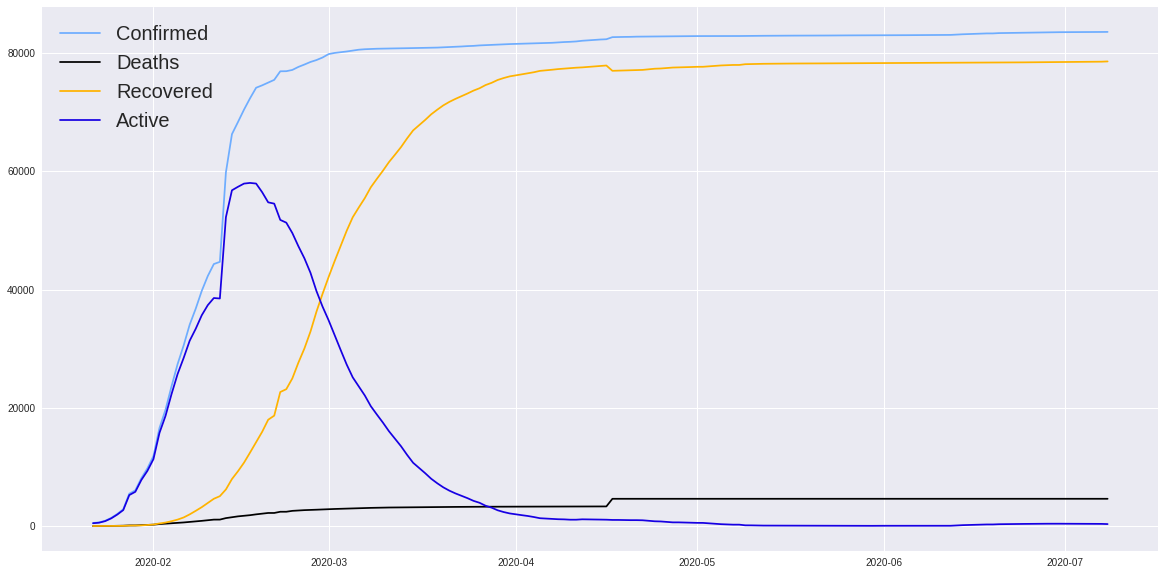

In [78]:
plt.figure(figsize=(20, 10))
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Deaths'], label='Deaths', color='black')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Recovered'], label='Recovered', color='#ffb300')
plt.plot(mainlnad_china['ObservationDate'], mainlnad_china['Active'], label='Active', color='#1700e3')

plt.legend(loc=2, prop={'size': 20})
plt.show()

### Pergunta 9
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos?
Grupo de escolhas da pergunta


In [47]:
italy = df_covid_19[df_covid_19['Country/Region'] == 'Italy'] # pegando os dados apenas da Italia
italy['ObservationDate'] = pd.to_datetime(italy['ObservationDate']).dt.date # tranformando a coluna em formato de data
italy = italy.groupby('ObservationDate').sum().reset_index()


/home/dsntos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


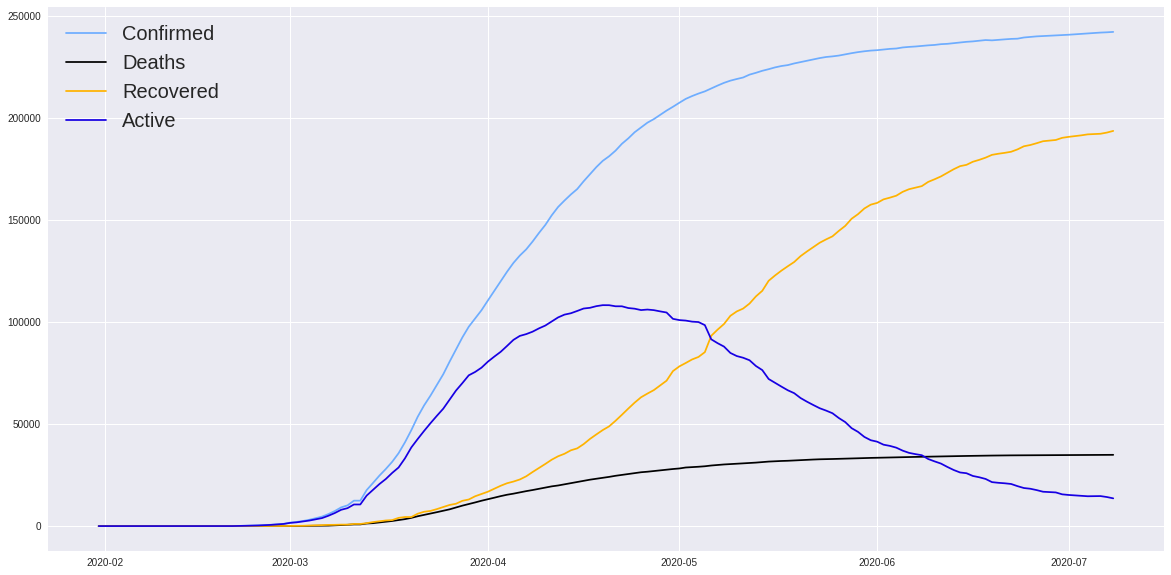

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(italy['ObservationDate'], italy['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(italy['ObservationDate'], italy['Deaths'], label='Deaths', color='black')
plt.plot(italy['ObservationDate'], italy['Recovered'], label='Recovered', color='#ffb300')
plt.plot(italy['ObservationDate'], italy['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

#interseção entre o Roxo e Laranja

### Pergunta 10
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

In [64]:
south_korea = df_covid_19[df_covid_19['Country/Region'] == 'South Korea'] # pegando os dados apenas da Coreia do sul
south_korea['ObservationDate'] = pd.to_datetime(south_korea['ObservationDate']).dt.date # tranformando a coluna em formato de data
south_korea = south_korea.groupby('ObservationDate').sum().reset_index()


/home/dsntos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


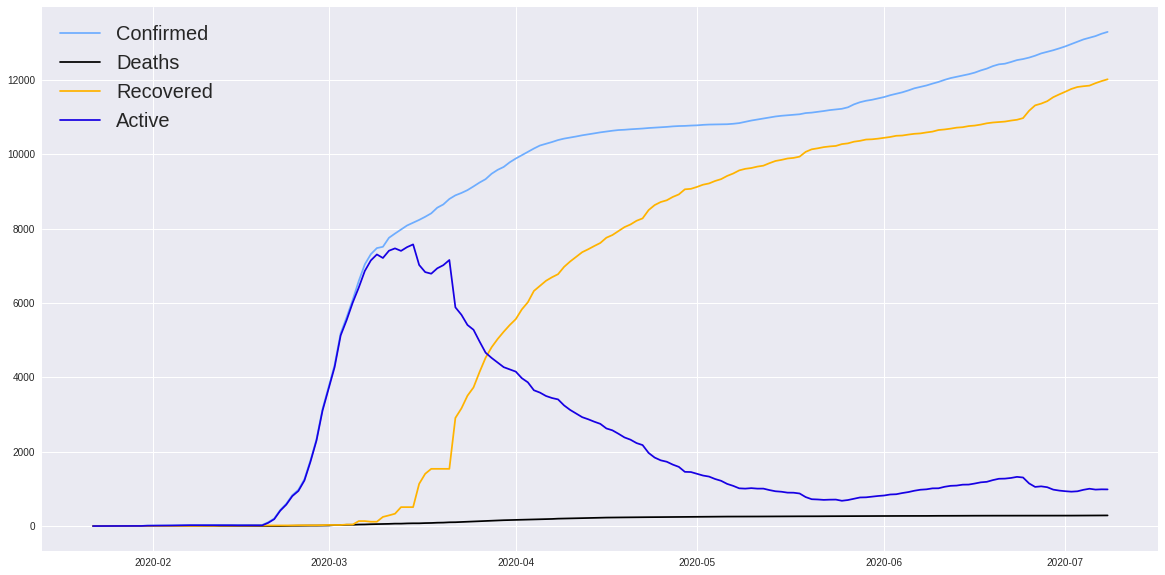

In [75]:
plt.figure(figsize=(20, 10))
plt.plot(south_korea['ObservationDate'], south_korea['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(south_korea['ObservationDate'], south_korea['Deaths'], label='Deaths', color='black')
plt.plot(south_korea['ObservationDate'], south_korea['Recovered'], label='Recovered', color='#ffb300')
plt.plot(south_korea['ObservationDate'], south_korea['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

#interseção entre o Roxo e Laranja

### Pergunta 11
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico?

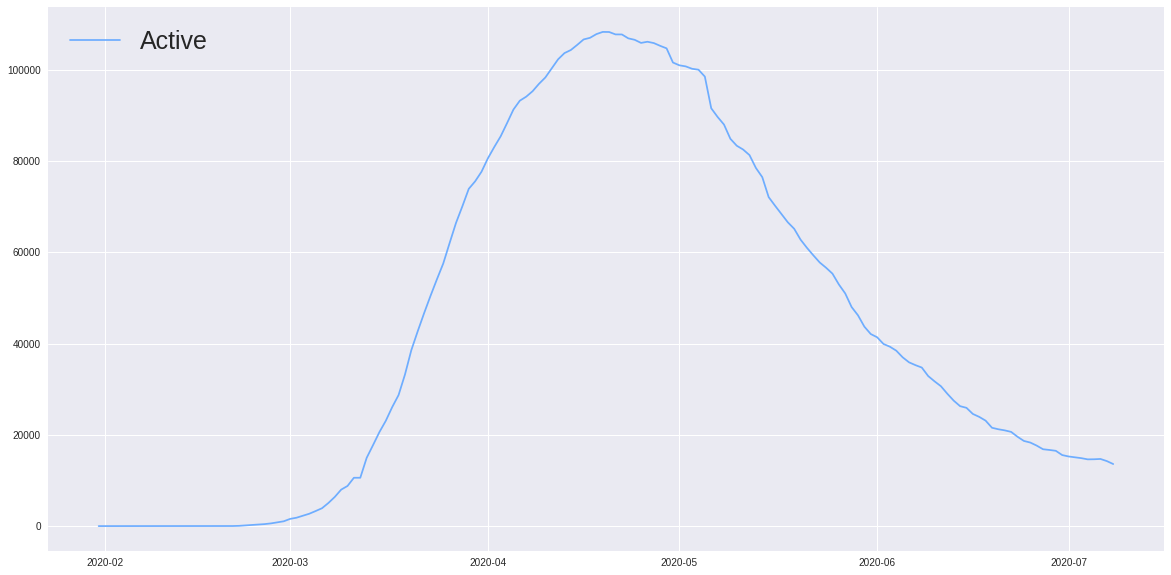

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(italy['ObservationDate'], italy['Active'], label='Active', color='#6eadff')

plt.legend(loc=2, prop={'size': 25})
plt.show()


### Pergunta 12
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?
Grupo de escolhas da pergunta


In [79]:
venezuela = df_covid_19[df_covid_19['Country/Region'] == 'Venezuela'] # pegando os dados apenas da Coreia do sul
venezuela['ObservationDate'] = pd.to_datetime(venezuela['ObservationDate']).dt.date # tranformando a coluna em formato de data
venezuela = venezuela.groupby('ObservationDate').sum().reset_index()

/home/dsntos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


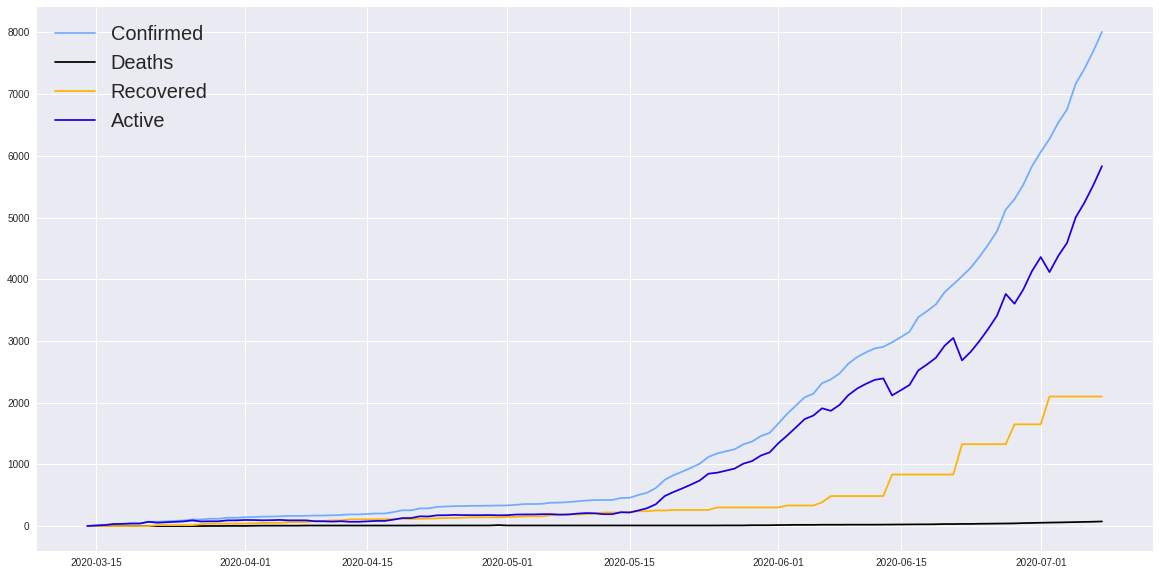

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(venezuela['ObservationDate'], venezuela['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(venezuela['ObservationDate'], venezuela['Deaths'], label='Deaths', color='black')
plt.plot(venezuela['ObservationDate'], venezuela['Recovered'], label='Recovered', color='#ffb300')
plt.plot(venezuela['ObservationDate'], venezuela['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

#interseção entre o Roxo e Laranja

In [ ]:
# "aplicando zoom in"

In [85]:
#filtrando dados apenas antes de 20 de maio
previous_may = venezuela[(venezuela['ObservationDate'] < pd.to_datetime('2020-05-20'))]

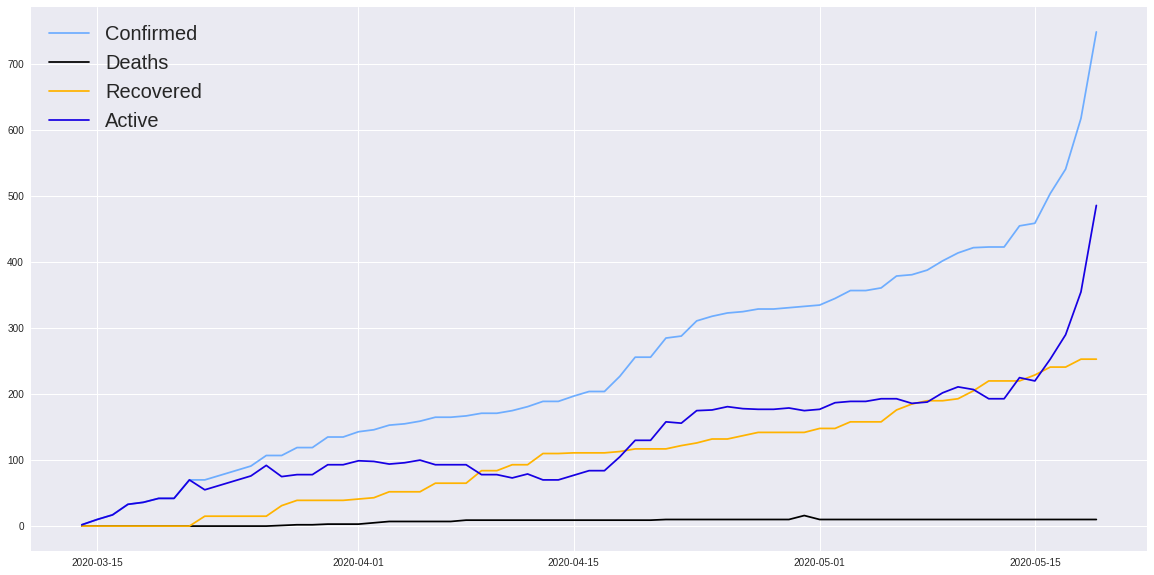

In [84]:
plt.figure(figsize=(20, 10))
plt.plot(previous_may['ObservationDate'], previous_may['Confirmed'], label='Confirmed', color='#6eadff')
plt.plot(previous_may['ObservationDate'], previous_may['Deaths'], label='Deaths', color='black')
plt.plot(previous_may['ObservationDate'], previous_may['Recovered'], label='Recovered', color='#ffb300')
plt.plot(previous_may['ObservationDate'], previous_may['Active'], label='Active', color='#1700e3')


plt.legend(loc=2, prop={'size': 20})
plt.show()

#interseção entre o Roxo e Laranja